In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Gamya\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_t=pd.read_excel(r"C:\Users\Gamya\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [5]:
df_t.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
19h 50m      1
5m           1
41h 20m      1
27h 55m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
category=['Airline','Source','Destination','Additional_Info']

In [12]:
for i in category:
    print(i,df[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [13]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [14]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
#Extracting hours and minutes from Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
#Extracting hours and minutes from arrival time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
#Finding the difference between departure and arrival time which is duration
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [22]:
# Adding duration_hours and duration_mins list to df dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [23]:
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [25]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [26]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=df[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [29]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=df[["Source"]]
Source=pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [34]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
df=pd.concat([df, Airline, Source, Destination], axis = 1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [37]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

Test Set

In [38]:
df_t.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [40]:
df_t.dropna(inplace = True)
print(df_t.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [41]:
# Date_of_Journey
df_t["Journey_day"] = pd.to_datetime(df_t.Date_of_Journey, format="%d/%m/%Y").dt.day
df_t["Journey_month"] = pd.to_datetime(df_t["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_t.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [42]:
# Dep_Time
df_t["Dep_hour"] = pd.to_datetime(df_t["Dep_Time"]).dt.hour
df_t["Dep_min"] = pd.to_datetime(df_t["Dep_Time"]).dt.minute
df_t.drop(["Dep_Time"], axis = 1, inplace = True)

In [43]:
# Arrival_Time
df_t["Arrival_hour"] = pd.to_datetime(df_t.Arrival_Time).dt.hour
df_t["Arrival_min"] = pd.to_datetime(df_t.Arrival_Time).dt.minute
df_t.drop(["Arrival_Time"], axis = 1, inplace = True)

In [44]:
# Duration
duration = list(df_t["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding Duration column to test set
df_t["Duration_hours"] = duration_hours
df_t["Duration_mins"] = duration_mins
df_t.drop(["Duration"], axis = 1, inplace = True)

In [45]:
# Categorical data
print(df_t["Airline"].value_counts())
Airline = pd.get_dummies(df_t["Airline"], drop_first= True)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


In [46]:
print(df_t["Source"].value_counts())
Source = pd.get_dummies(df_t["Source"], drop_first= True)

print(df_t["Destination"].value_counts())
Destination = pd.get_dummies(df_t["Destination"], drop_first = True)

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [47]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_t.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [48]:
df_t["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
# Replacing Total_Stops
df_t.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [50]:
df_t=pd.concat([df_t, Airline, Source, Destination], axis = 1)

In [51]:
df_t.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [52]:
df_t.shape

(2671, 28)

In [53]:
df_t.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


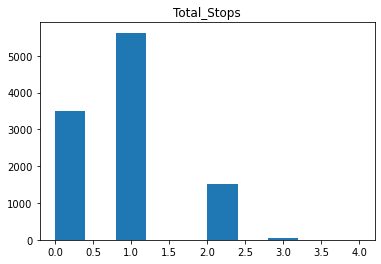

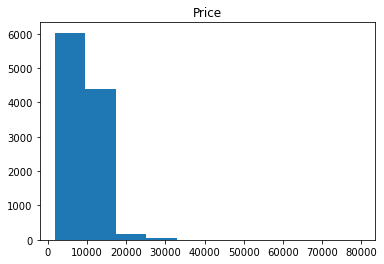

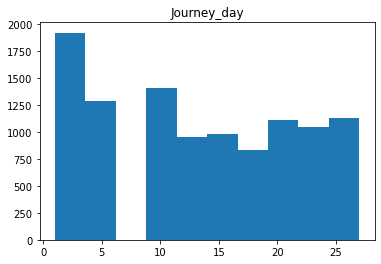

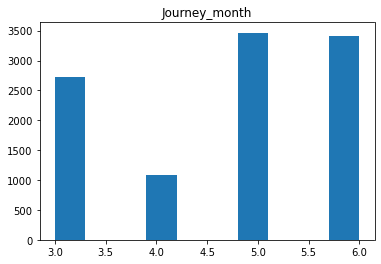

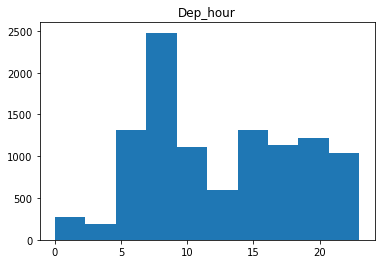

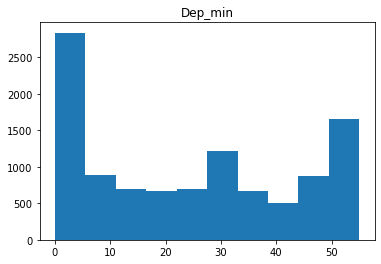

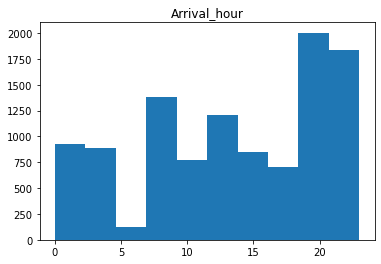

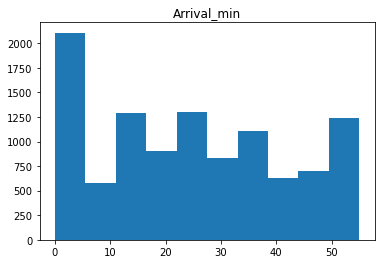

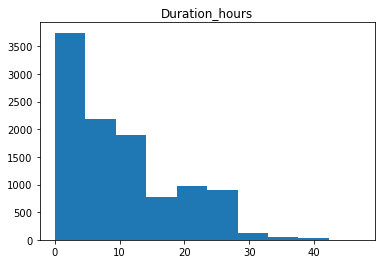

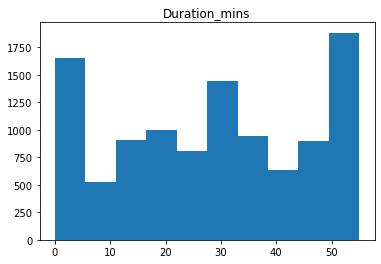

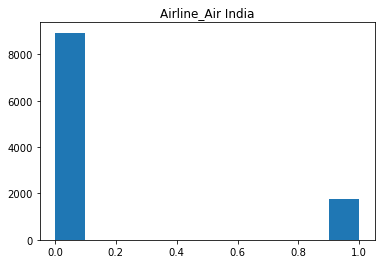

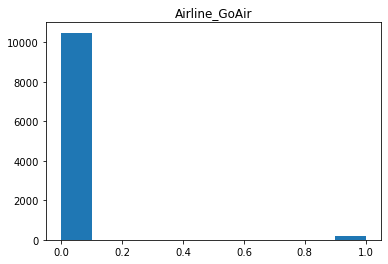

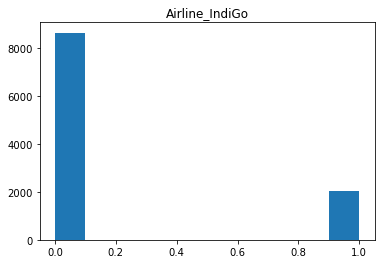

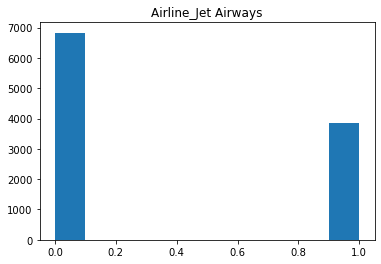

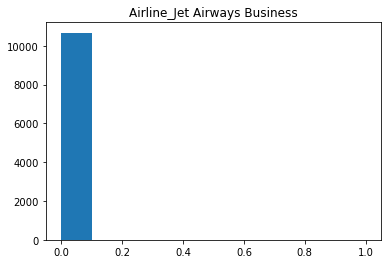

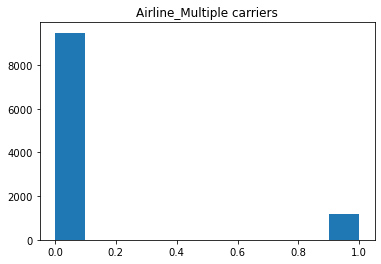

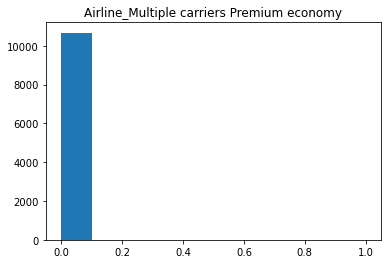

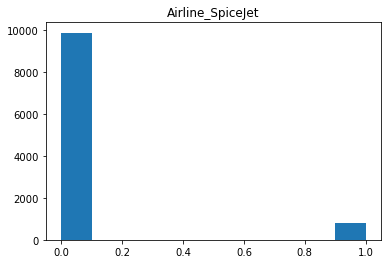

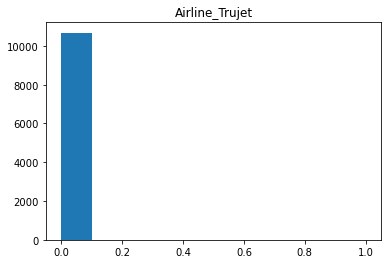

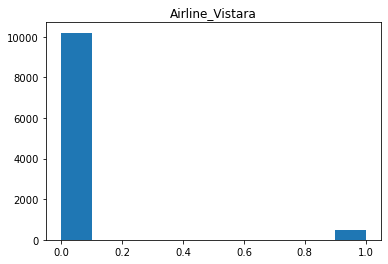

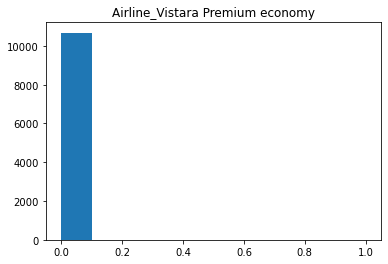

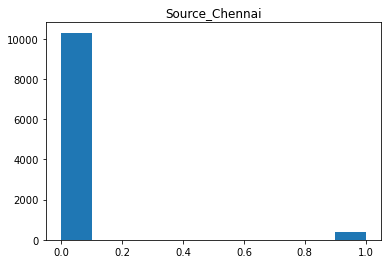

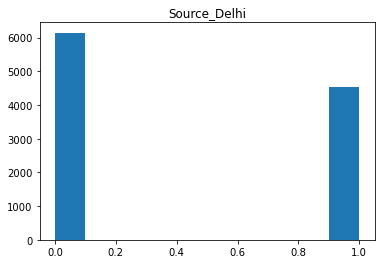

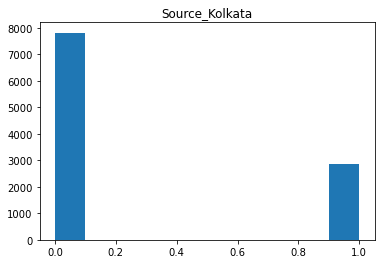

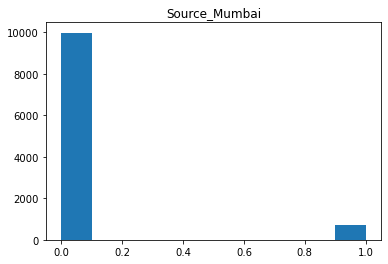

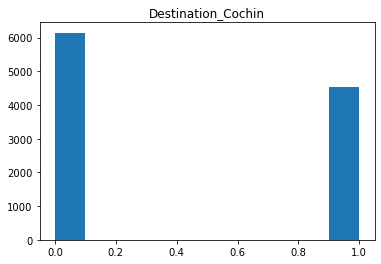

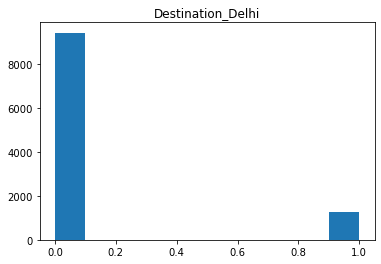

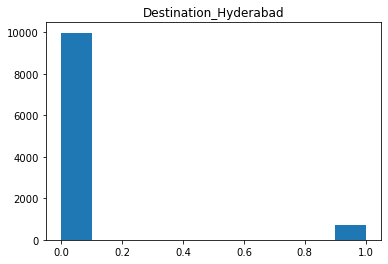

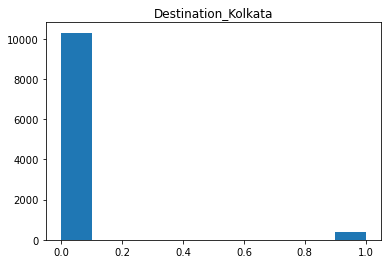

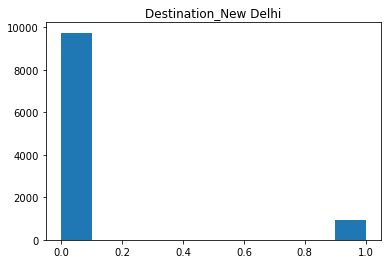

In [54]:
for i in df:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

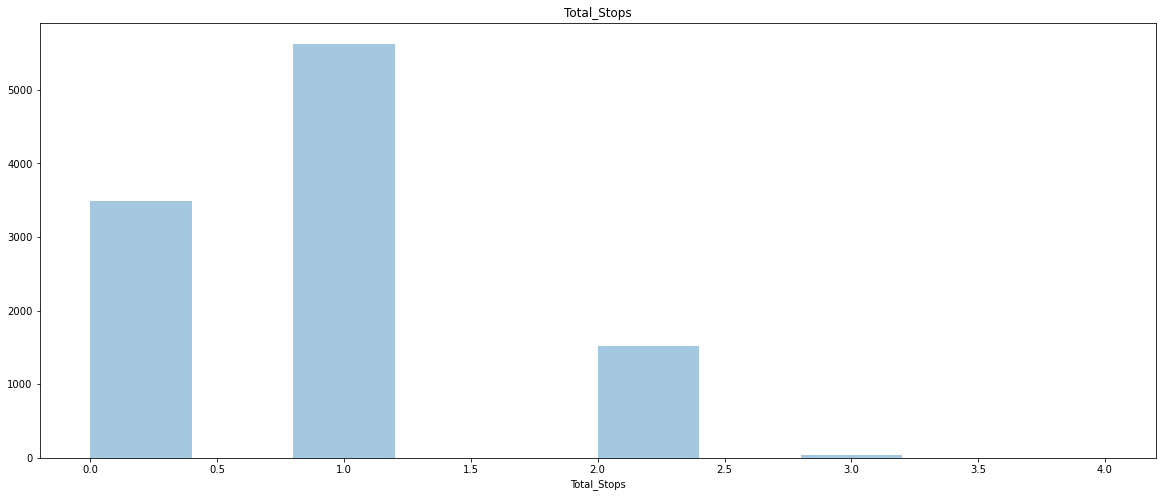

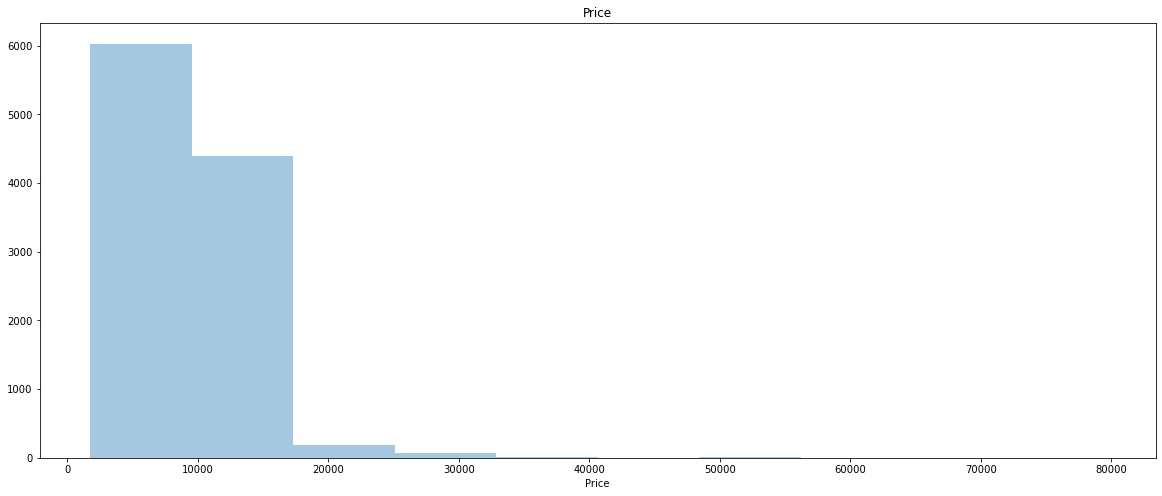

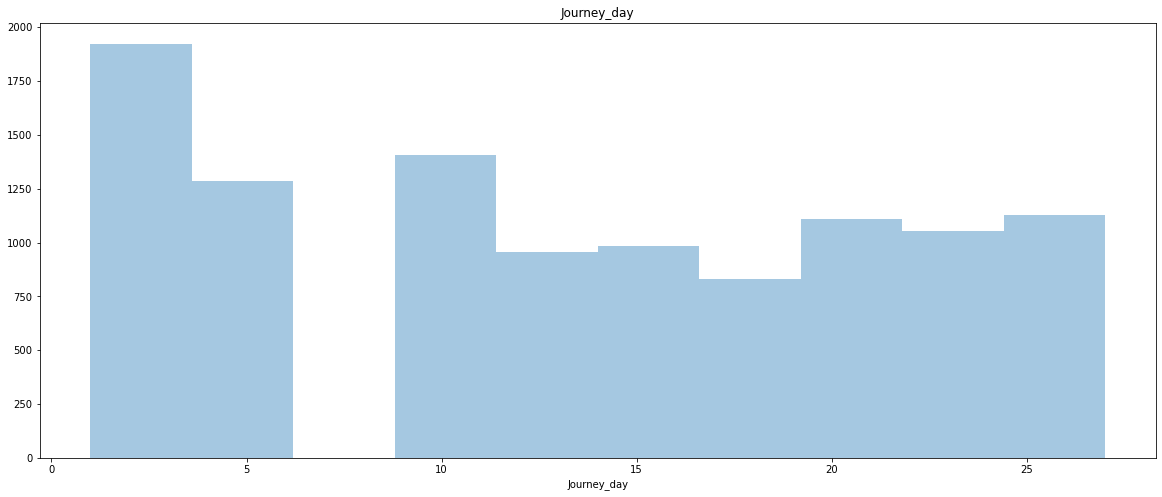

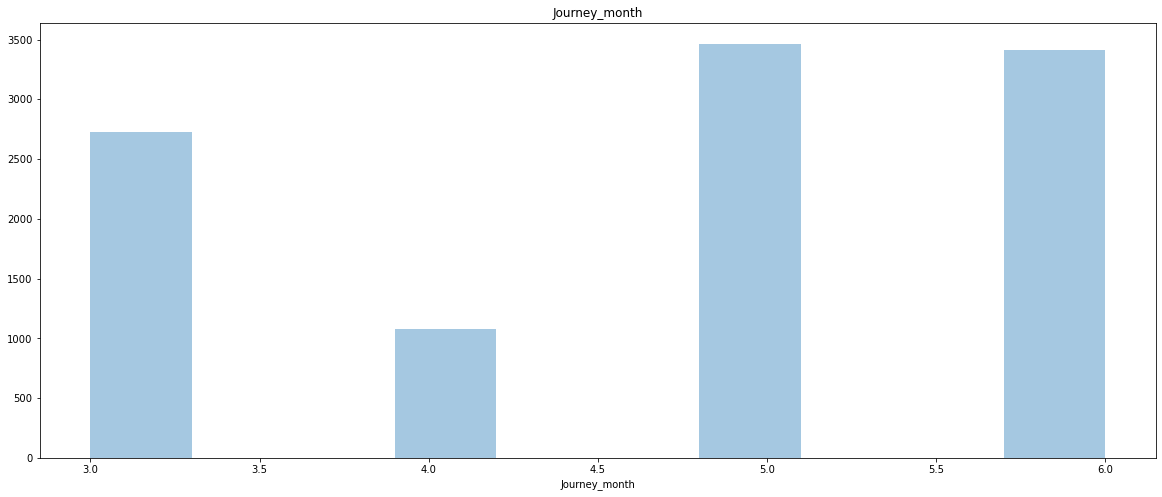

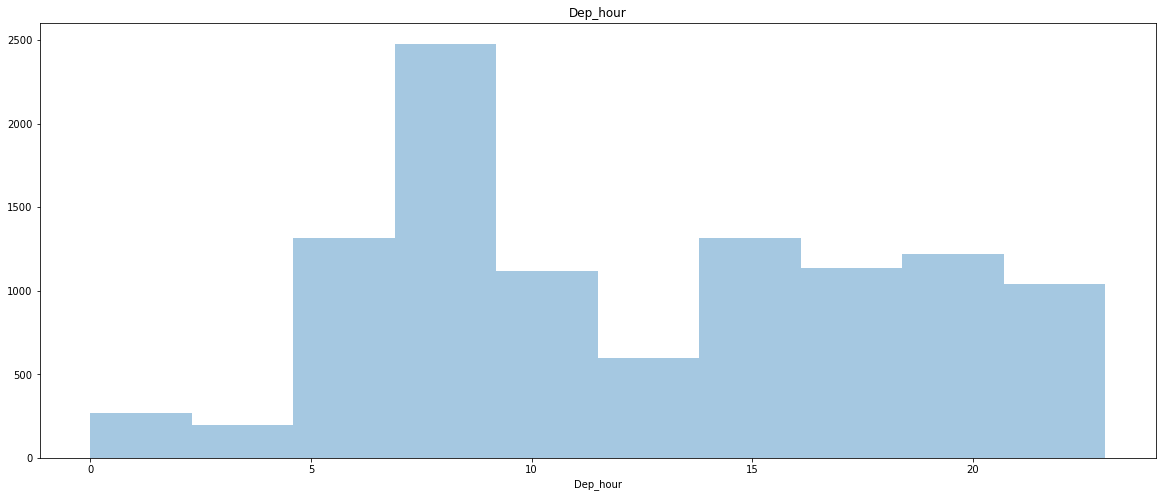

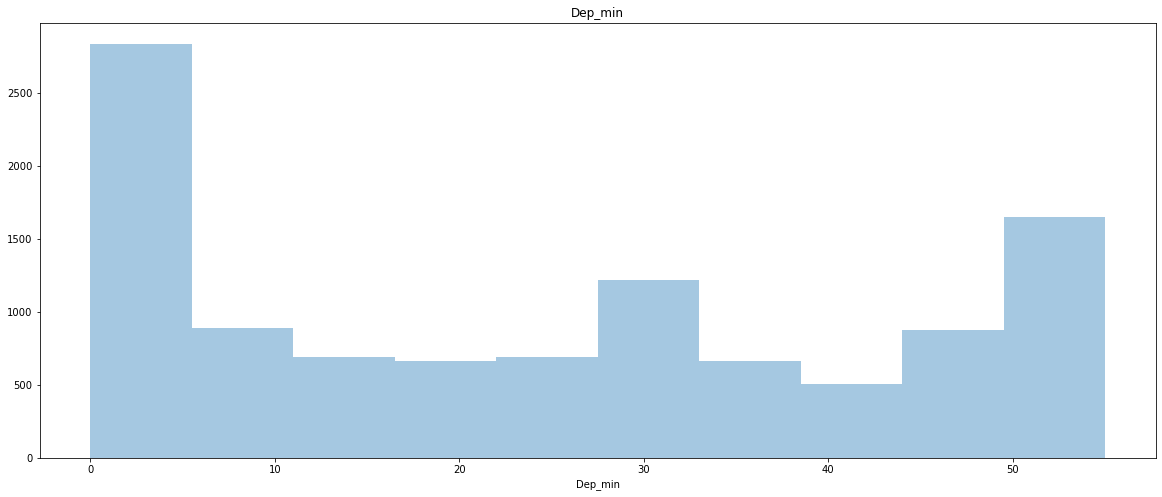

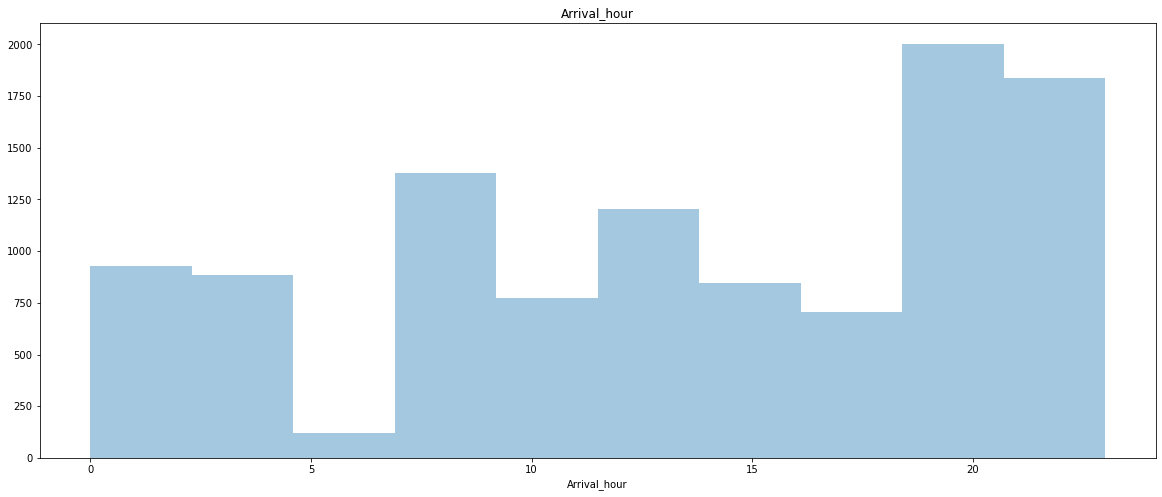

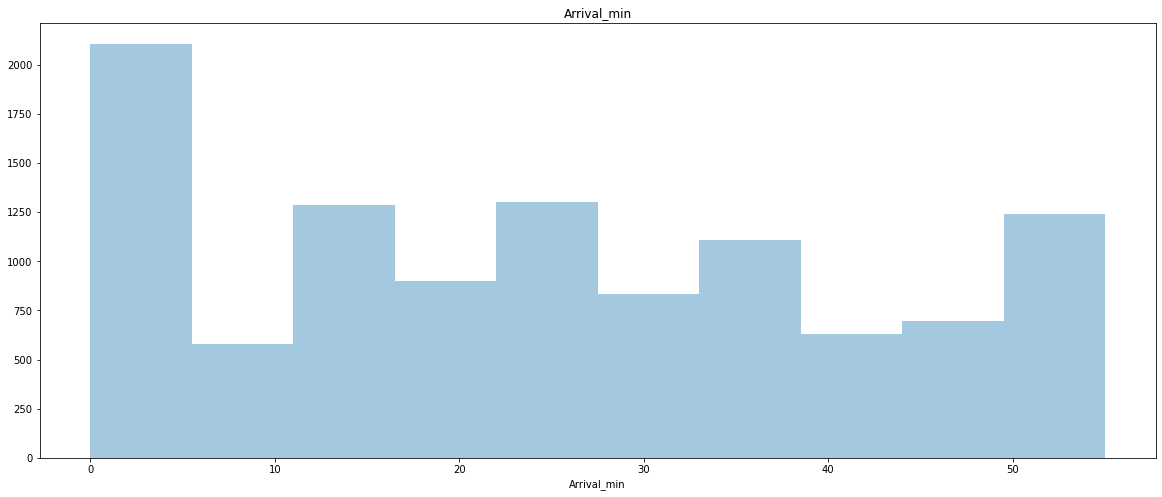

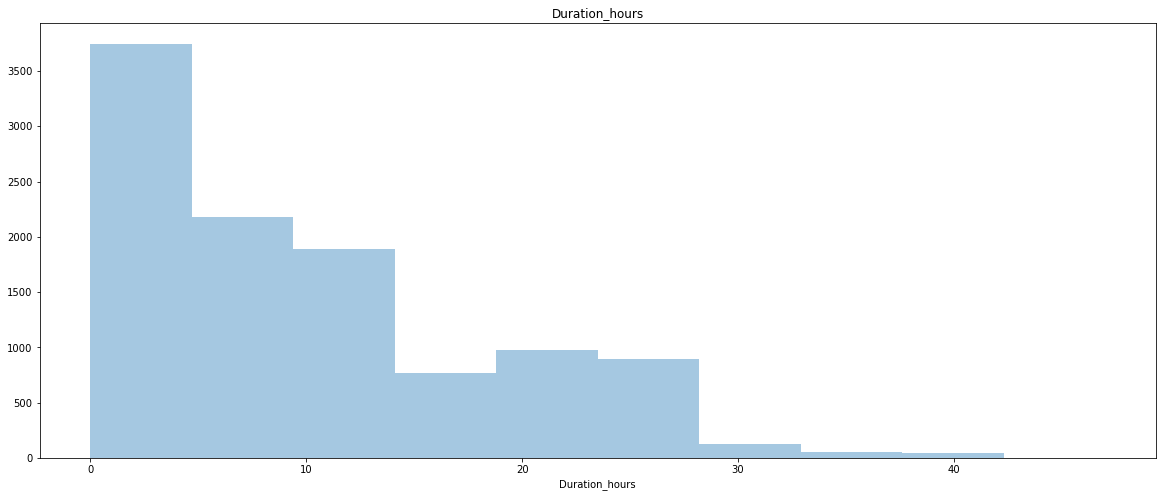

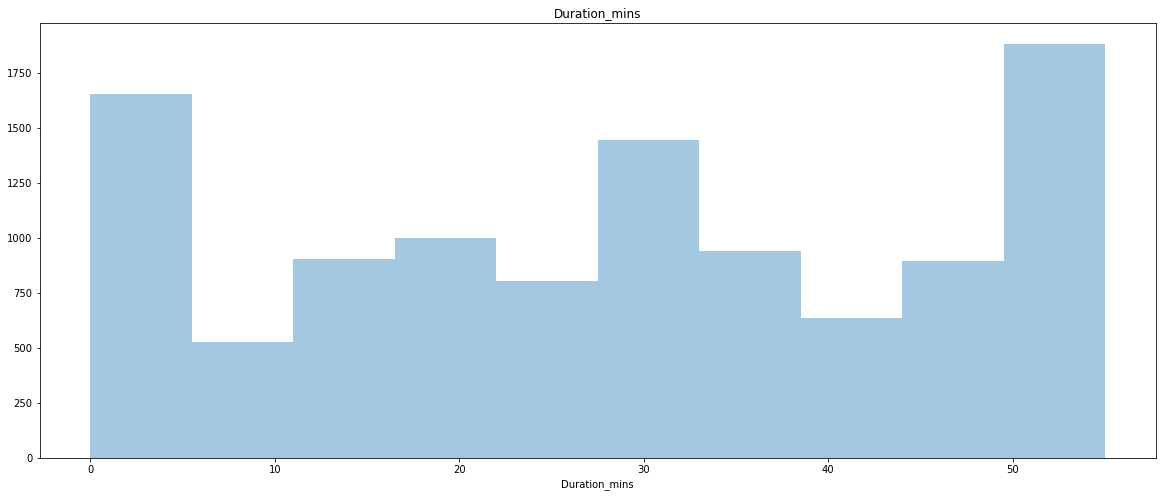

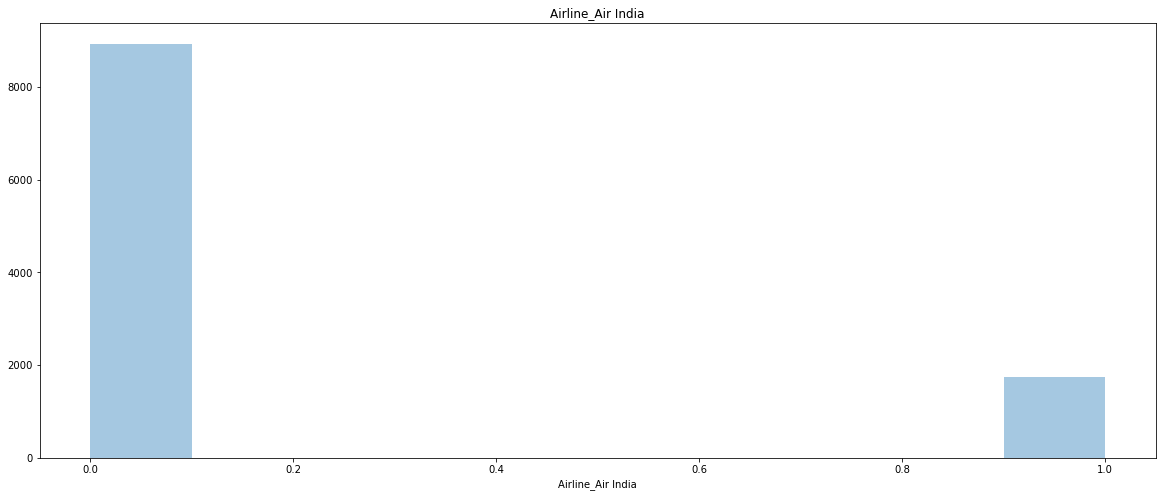

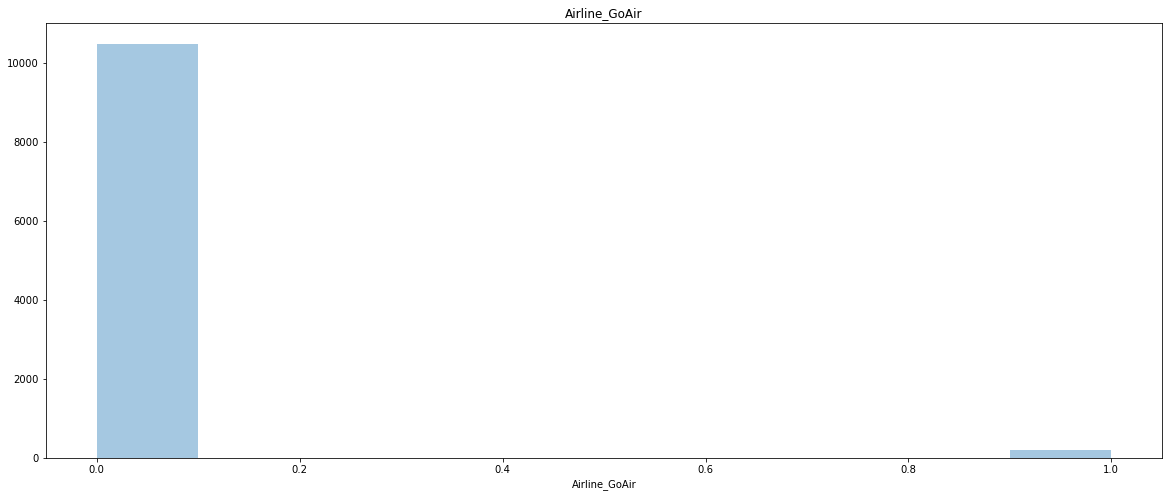

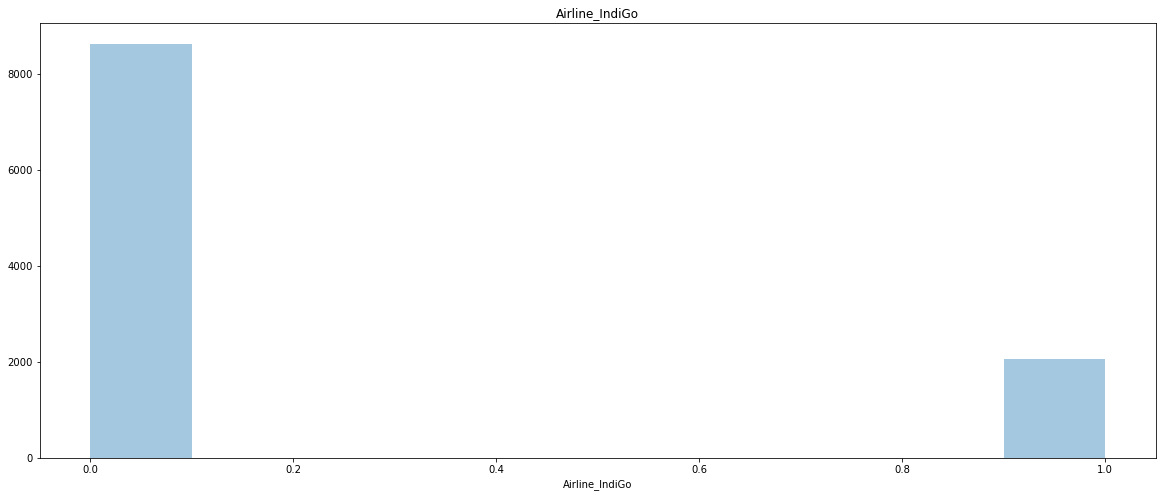

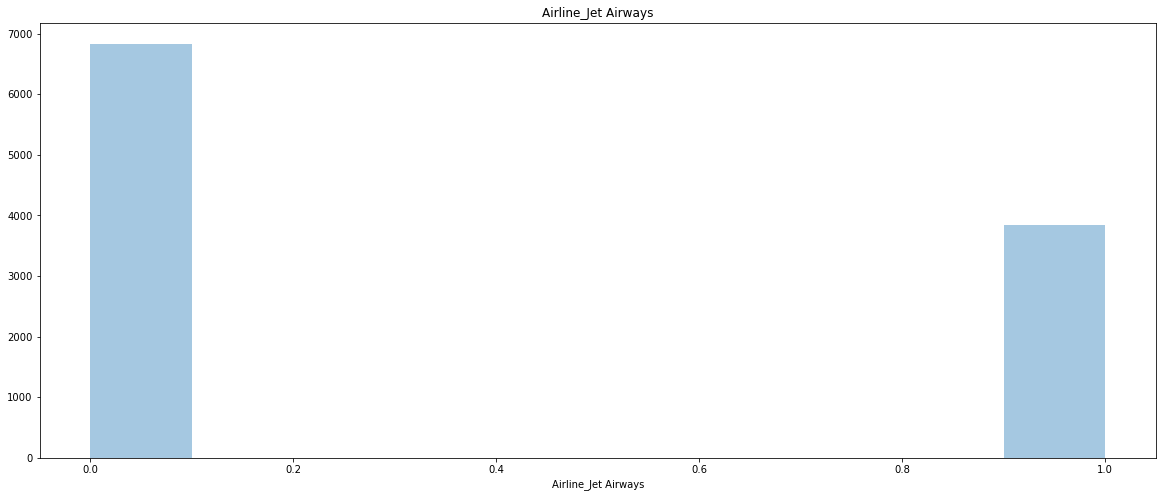

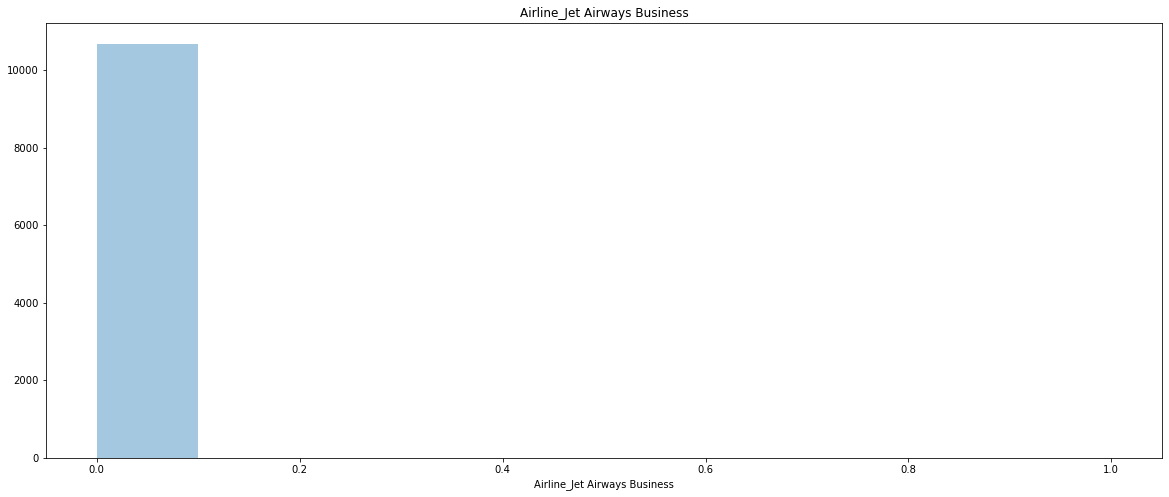

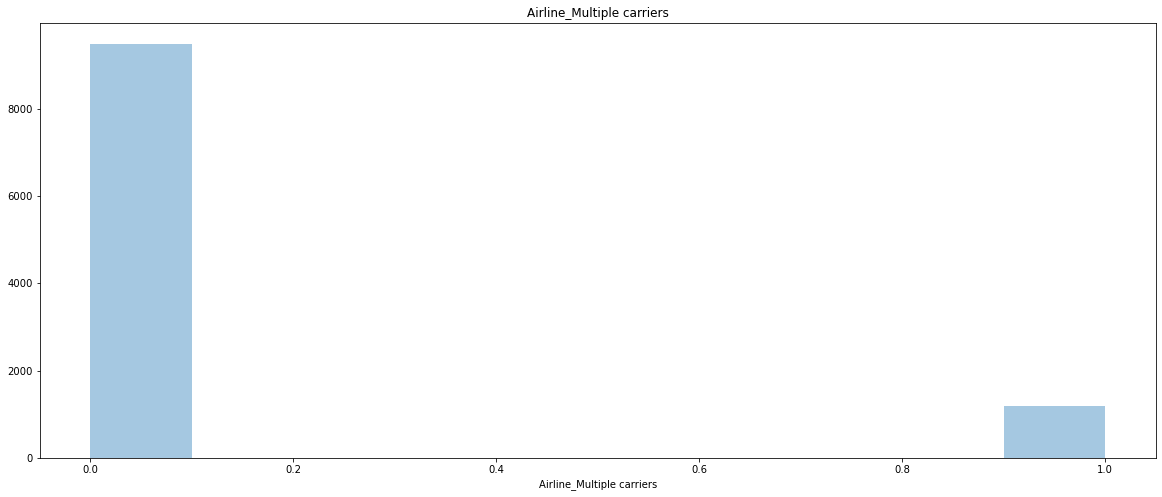

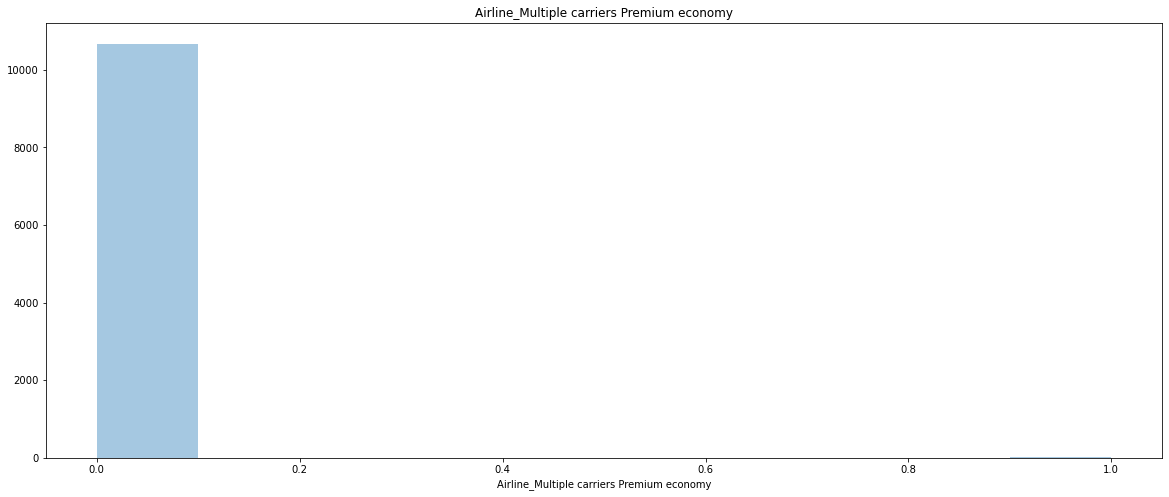

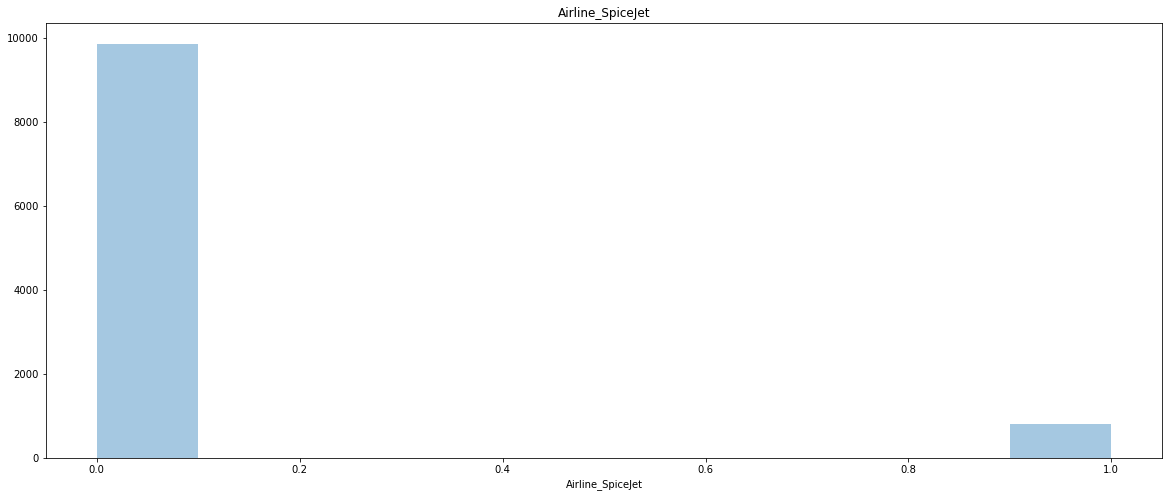

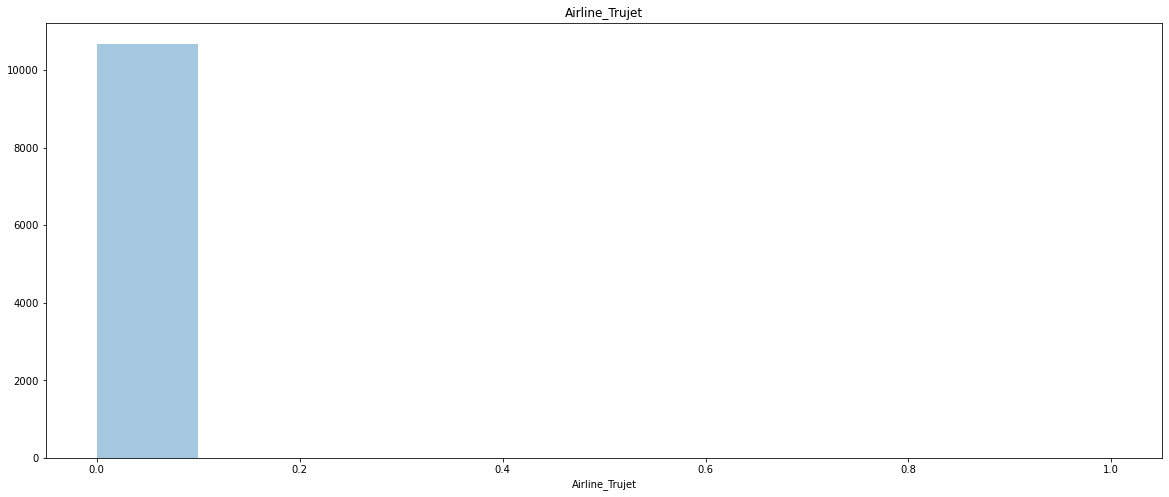

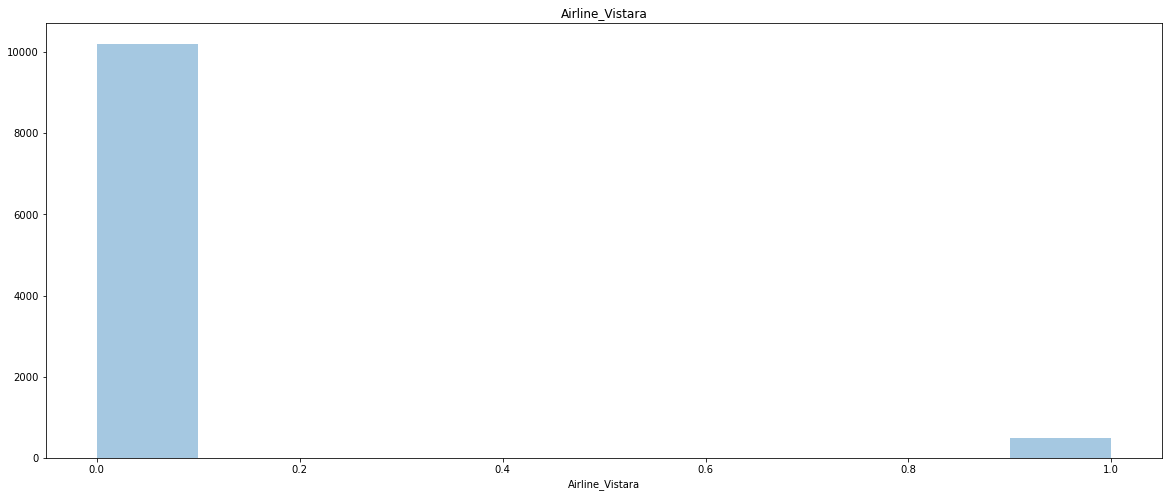

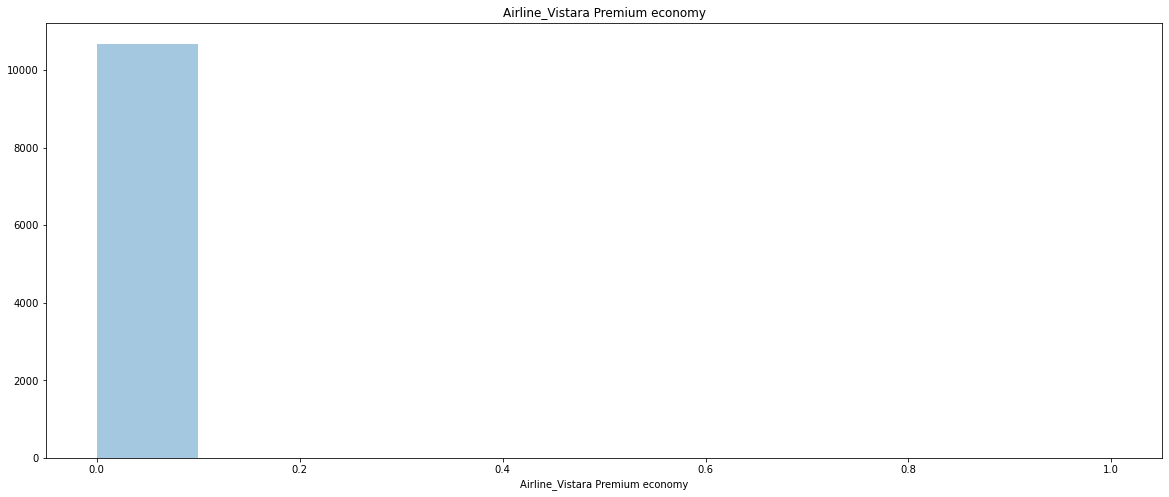

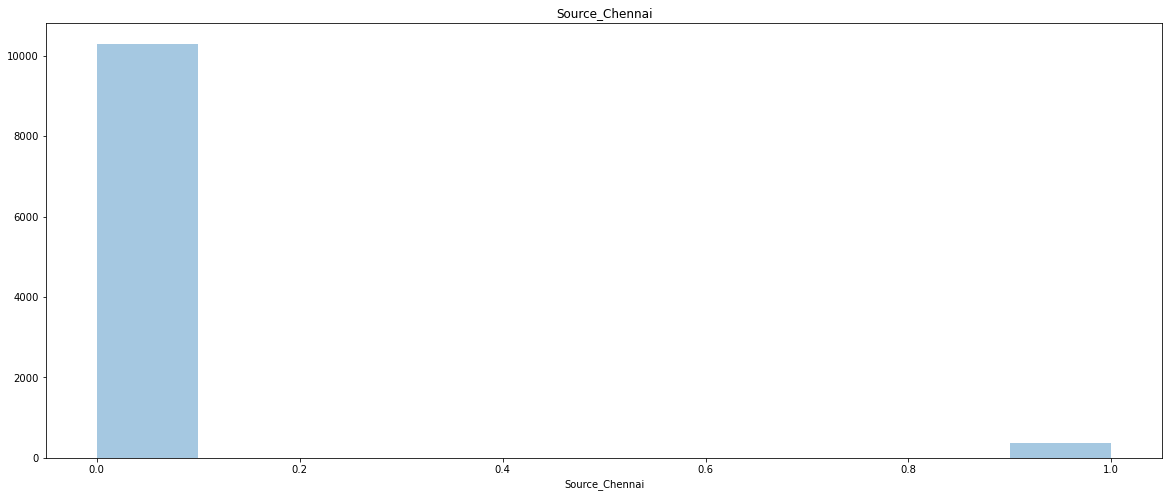

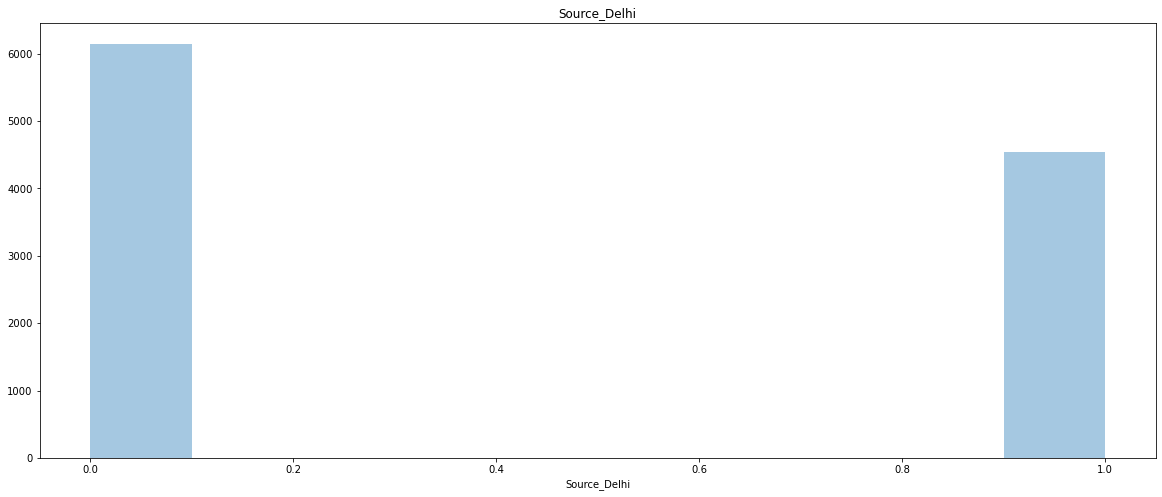

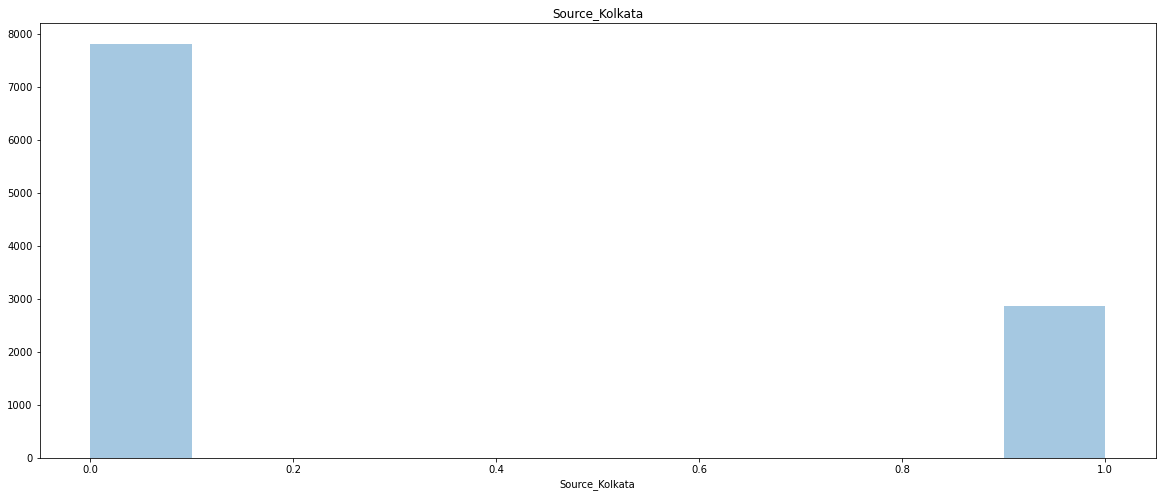

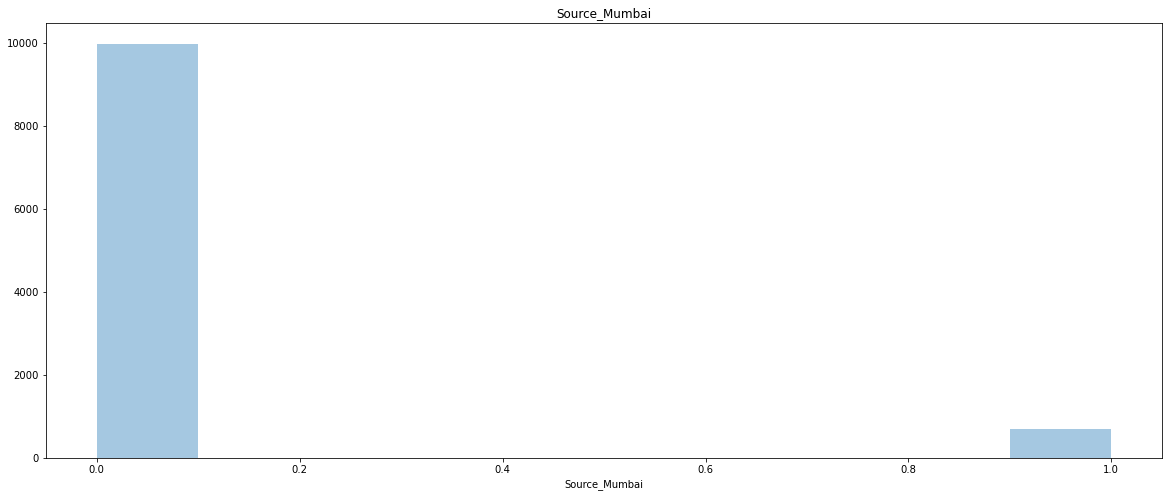

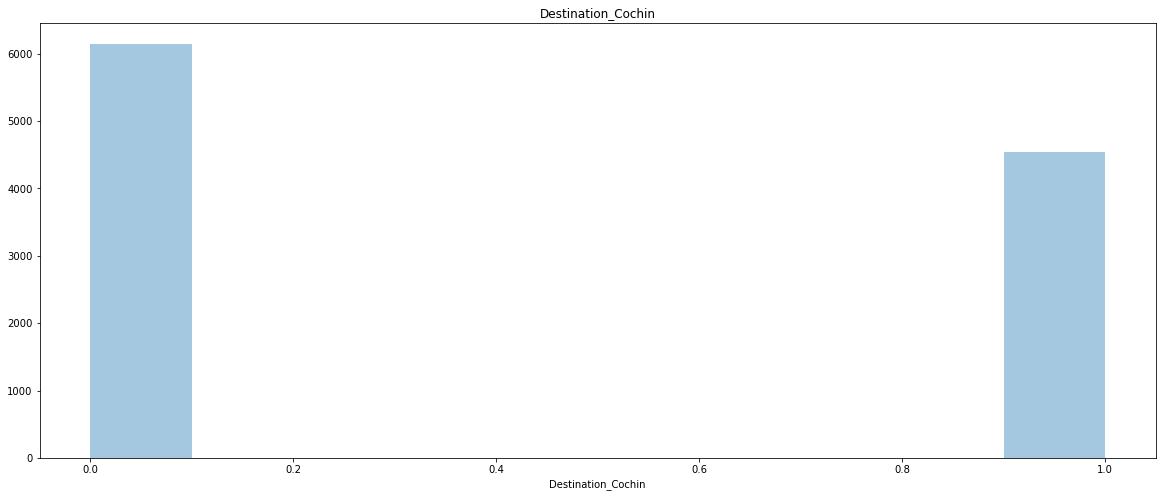

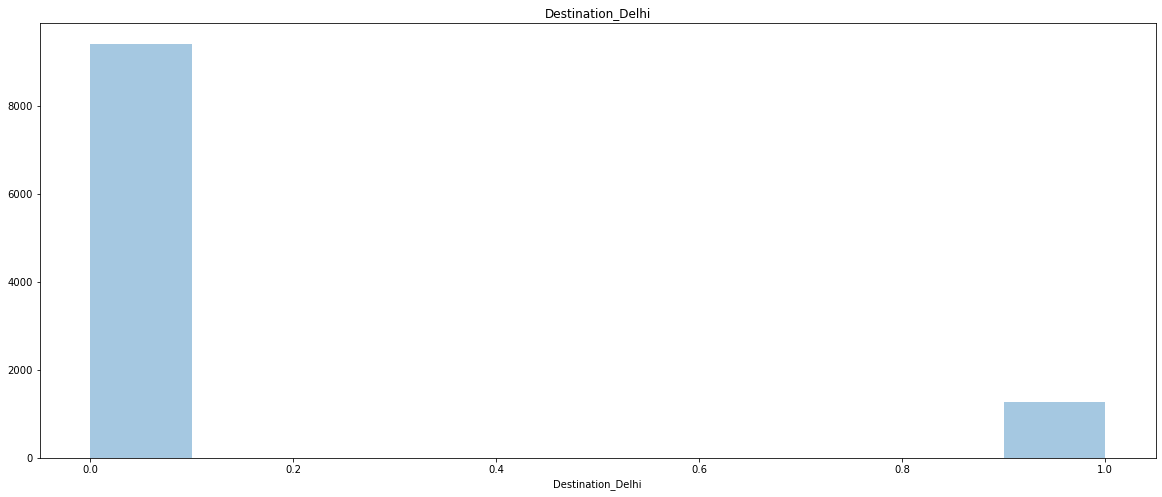

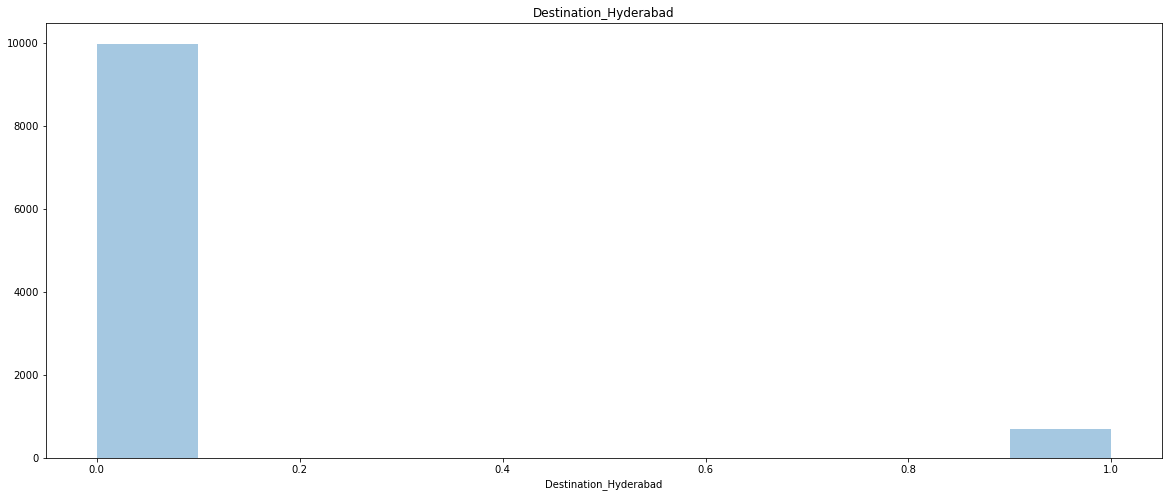

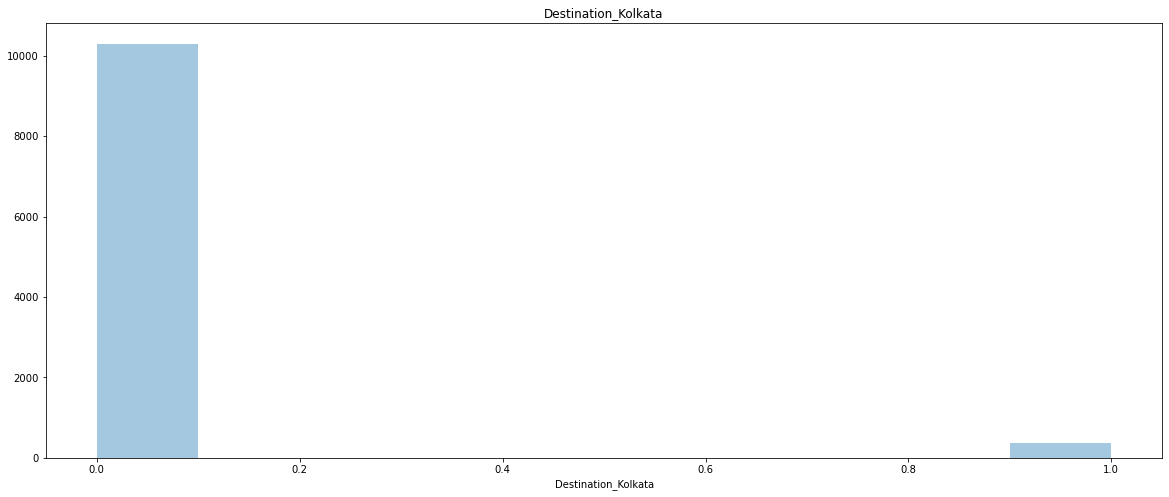

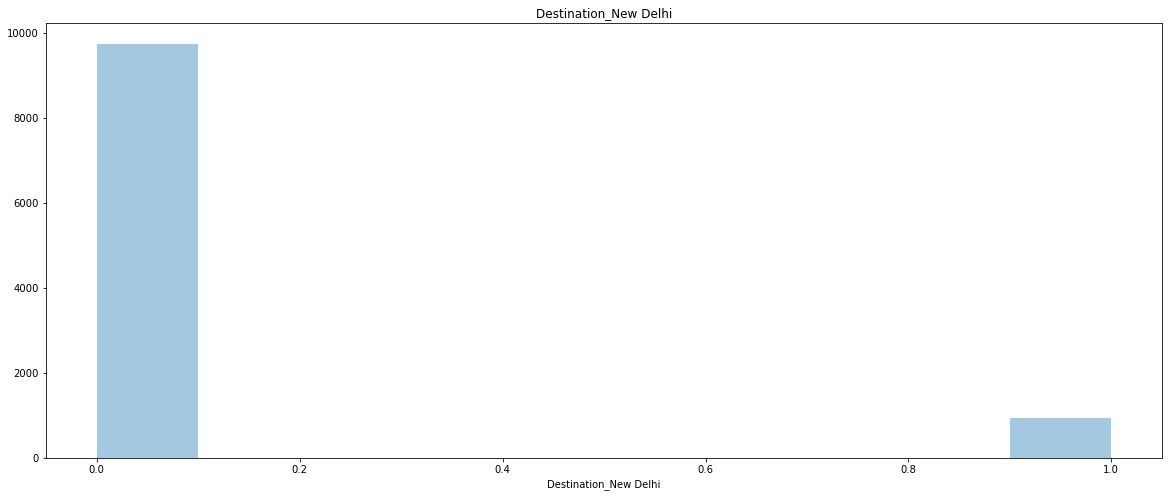

In [55]:
for i in df:                                 
    plt.figure(figsize = (20, 8))
    sns.distplot(a= df[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

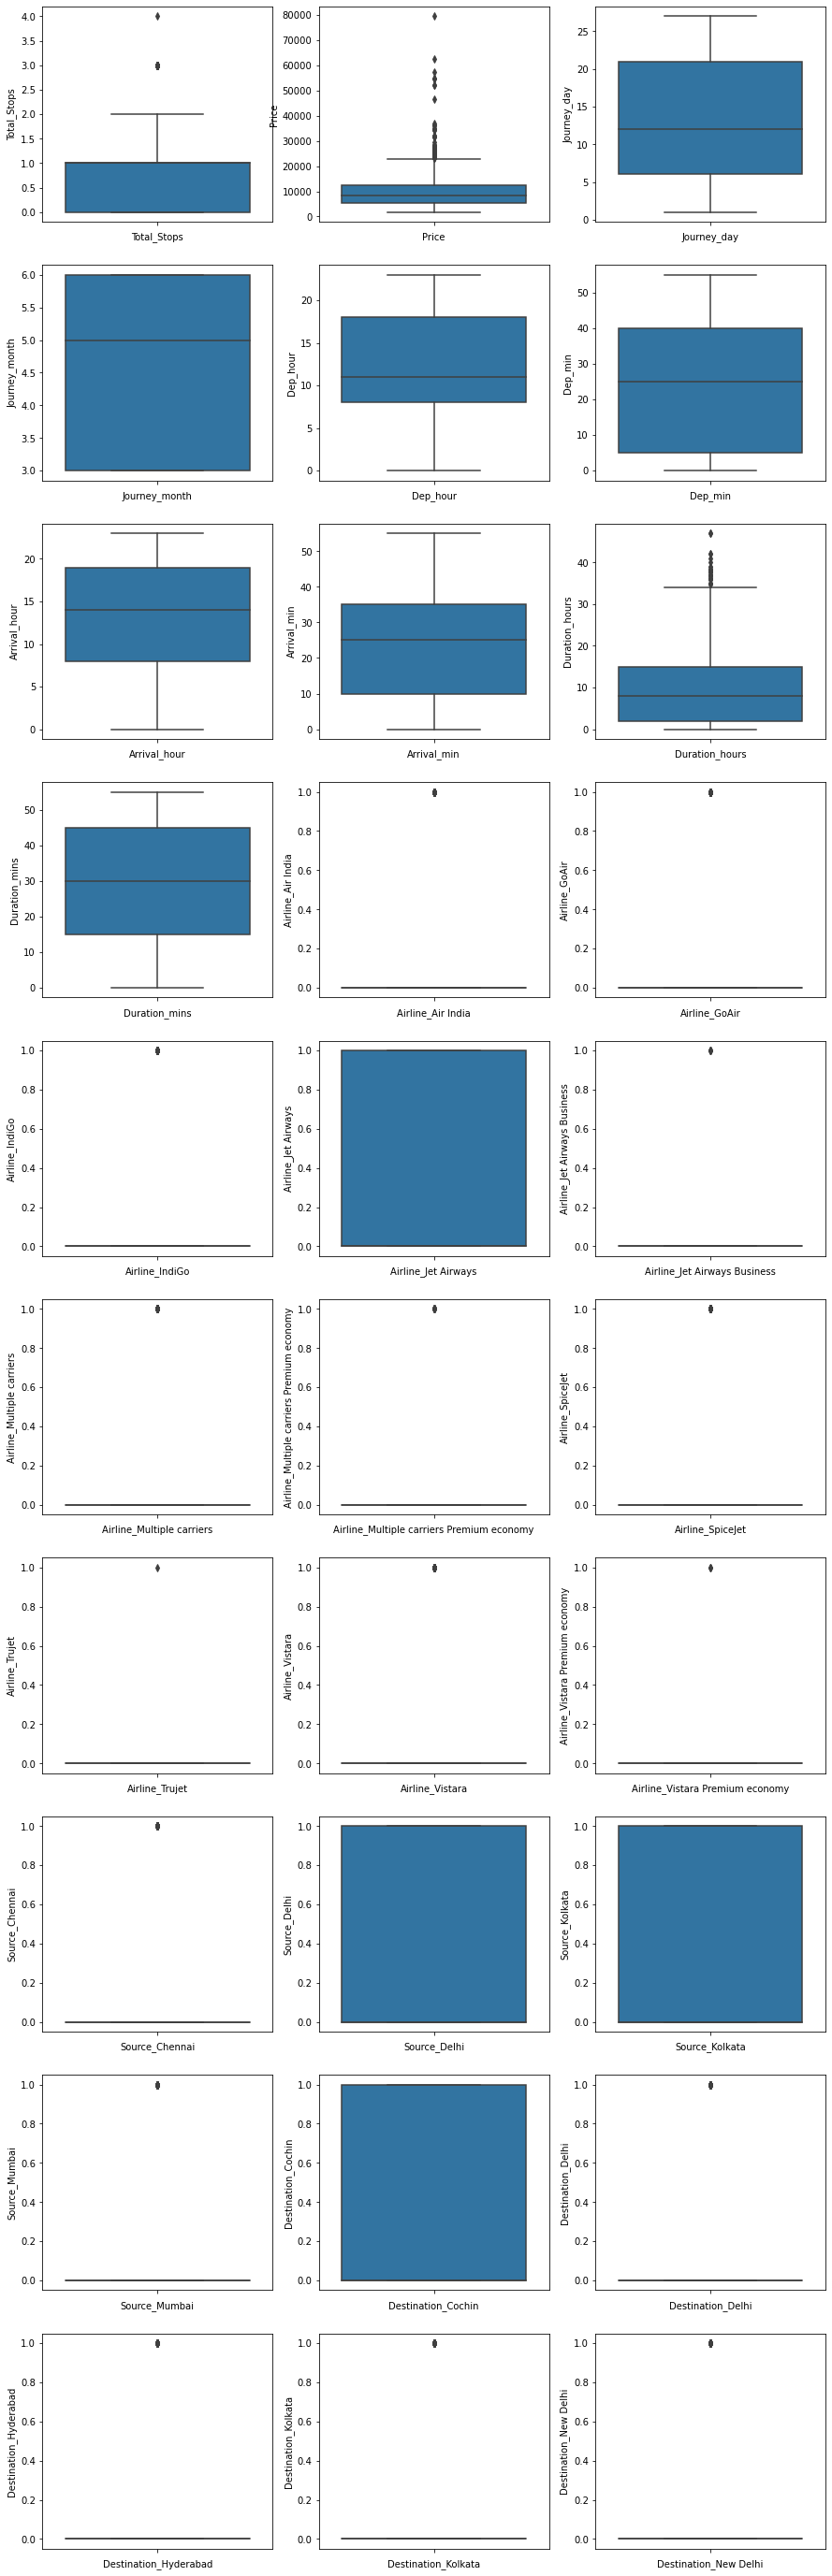

In [56]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [57]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['Total_Stops','Price','Duration_hours']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

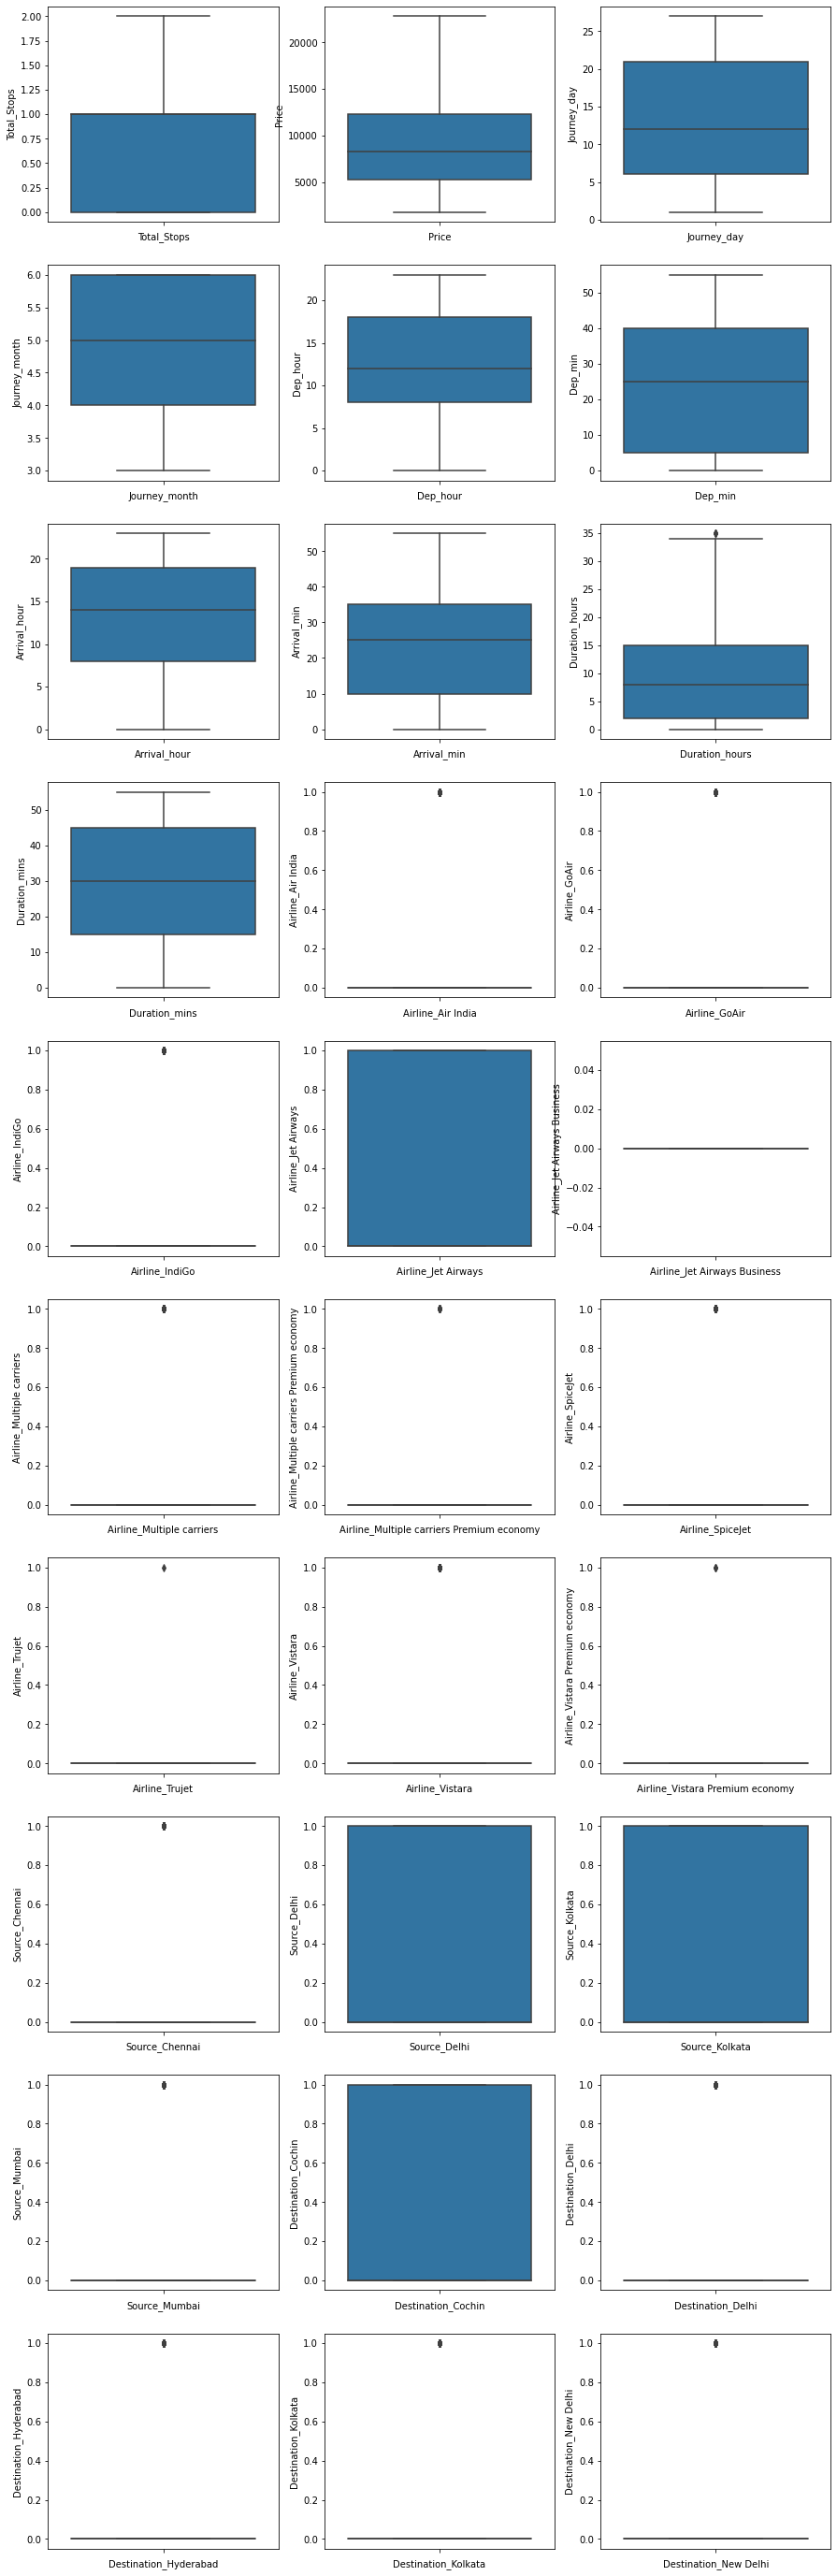

In [58]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [59]:
df.skew()

Total_Stops                                    0.229781
Price                                          0.415847
Journey_day                                    0.107486
Journey_month                                 -0.417433
Dep_hour                                       0.100324
Dep_min                                        0.172811
Arrival_hour                                  -0.362901
Arrival_min                                    0.106791
Duration_hours                                 0.765124
Duration_mins                                 -0.097756
Airline_Air India                              1.866859
Airline_GoAir                                  7.148099
Airline_IndiGo                                 1.533847
Airline_Jet Airways                            0.588026
Airline_Jet Airways Business                   0.000000
Airline_Multiple carriers                      2.455907
Airline_Multiple carriers Premium economy     28.354902
Airline_SpiceJet                               3

In [60]:
df.shape

(10488, 30)

In [61]:
#making the skewness less than or equal to 0.5 for better prediction and to get normal distribution graph
skew=('Duration_hours','Airline_Air India','Airline_GoAir','Airline_Multiple carriers','Airline_Multiple carriers Premium economy','Airline_SpiceJet','Airline_Trujet','Airline_Vistara','Airline_Vistara Premium economy','Source_Chennai','Source_Kolkata','Source_Mumbai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi')
for col in skew:
    if df.skew().loc[col]>0.5:
        df[col]=np.log1p(df[col])

In [62]:
df.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.670289,-0.000700,0.076351,-0.042728,-0.004483,0.029524,-0.110305,0.831911,-0.130751,...,-0.020709,-0.237705,0.502718,0.043012,-0.272605,0.502718,-0.453416,-0.272605,-0.237705,-0.029467
Price,0.670289,1.000000,-0.115268,-0.042764,0.014407,-0.056146,0.033266,-0.100381,0.675941,-0.137114,...,0.000435,-0.194865,0.334265,0.041257,-0.262527,0.334265,-0.339354,-0.262527,-0.194865,0.104066
Journey_day,-0.000700,-0.115268,1.000000,-0.058400,0.000489,-0.003016,-0.003596,-0.017990,-0.017146,-0.009825,...,-0.020605,0.004223,0.095203,-0.070081,-0.015649,0.095203,-0.002059,-0.015649,0.004223,-0.044416
Journey_month,0.076351,-0.042764,-0.058400,1.000000,0.034775,-0.053141,-0.000598,-0.100610,0.053784,-0.045122,...,-0.020468,0.001992,0.137234,0.078573,-0.039756,0.137234,0.085011,-0.039756,0.001992,-0.444209
Dep_hour,-0.042728,0.014407,0.000489,0.034775,1.000000,-0.026962,0.013285,0.068869,0.003512,-0.031612,...,-0.003560,-0.016715,-0.114534,0.153742,-0.018929,-0.114534,0.006333,-0.018929,-0.016715,-0.022348
Dep_min,-0.004483,-0.056146,-0.003016,-0.053141,-0.026962,1.000000,0.044899,-0.017003,-0.036568,0.091797,...,-0.011443,0.068701,-0.080795,-0.022815,0.039174,-0.080795,0.004749,0.039174,0.068701,0.095414
Arrival_hour,0.029524,0.033266,-0.003596,-0.000598,0.013285,0.044899,1.000000,-0.152937,0.062205,-0.114306,...,0.000851,-0.014158,-0.007738,0.055361,-0.034502,-0.007738,-0.029705,-0.034502,-0.014158,0.000137
Arrival_min,-0.110305,-0.100381,-0.017990,-0.100610,0.068869,-0.017003,-0.152937,1.000000,-0.128285,0.150535,...,0.000316,-0.030721,-0.213515,0.120884,0.080537,-0.213515,0.096020,0.080537,-0.030721,0.022986
Duration_hours,0.831911,0.675941,-0.017146,0.053784,0.003512,-0.036568,0.062205,-0.128285,1.000000,-0.167722,...,-0.019878,-0.228169,0.421730,0.137302,-0.379305,0.421730,-0.407028,-0.379305,-0.228169,-0.001726
Duration_mins,-0.130751,-0.137114,-0.009825,-0.045122,-0.031612,0.091797,-0.114306,0.150535,-0.167722,1.000000,...,0.004903,-0.100574,-0.152518,0.011345,-0.019517,-0.152518,0.218209,-0.019517,-0.100574,0.084091


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

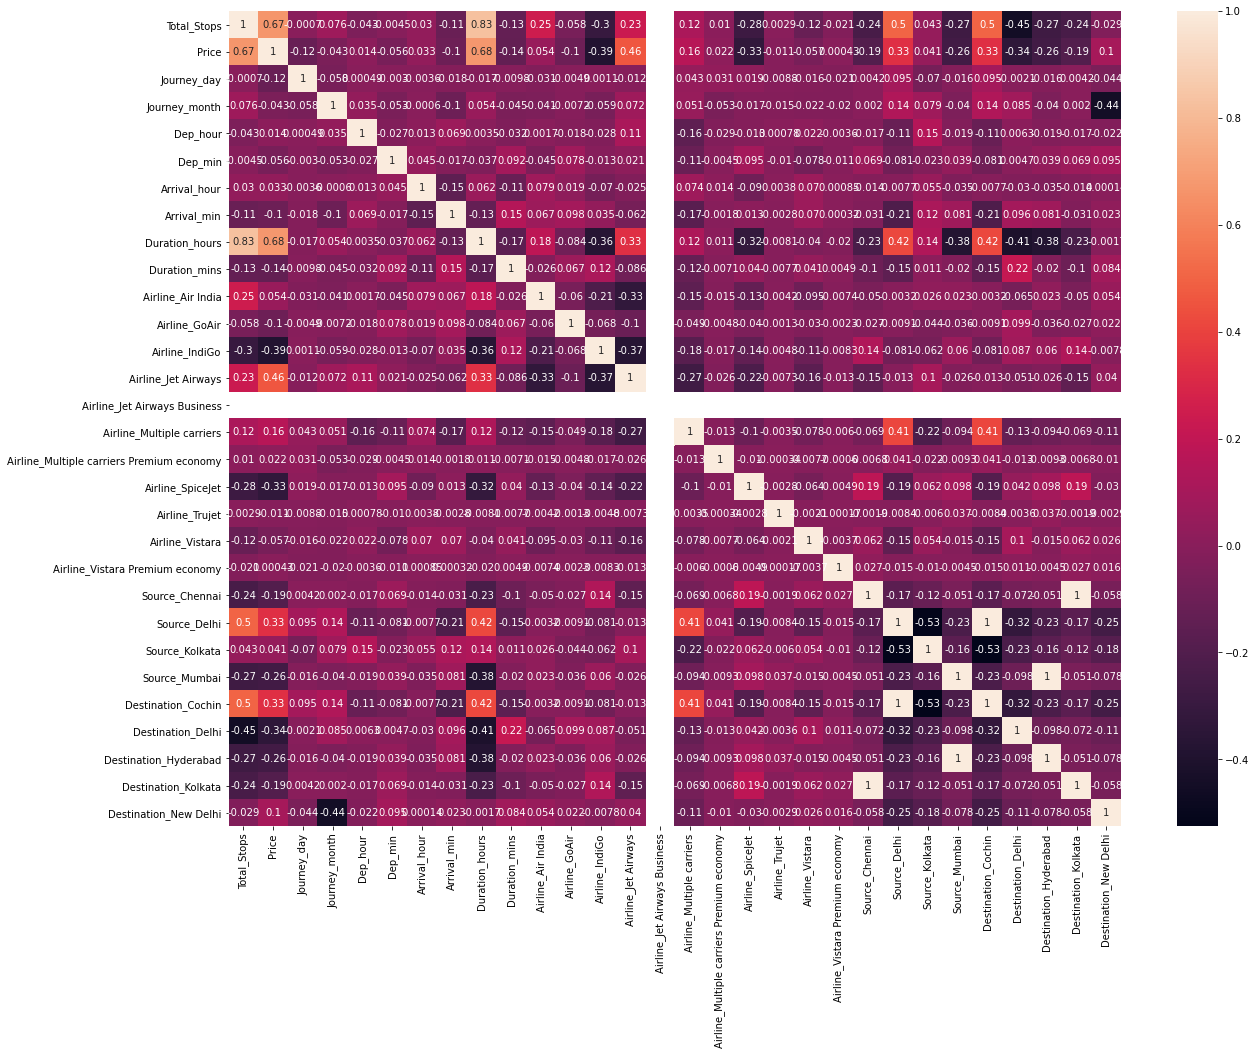

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot

In [64]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,1.098612,50,...,0.0,0.0,0,0.000000,0.0,0,0.0,0.0,0.0,0.693359
1,2,7662,1,5,5,50,13,15,2.079442,25,...,0.0,0.0,0,0.693359,0.0,0,0.0,0.0,0.0,0.000000
2,2,13882,9,6,9,25,4,25,2.995732,0,...,0.0,0.0,1,0.000000,0.0,1,0.0,0.0,0.0,0.000000
3,1,6218,12,5,18,5,23,30,1.791759,25,...,0.0,0.0,0,0.693359,0.0,0,0.0,0.0,0.0,0.000000
4,1,13302,1,3,16,50,21,35,1.609438,45,...,0.0,0.0,0,0.000000,0.0,0,0.0,0.0,0.0,0.693359


In [65]:
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop('Price', axis = 1)


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [83]:
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

In [85]:
models = [dt,svr,knn,lr]
for i in models:
    print(i)
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(X_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 score is ',r2_score(y_test,pred))
        print('R2 for train data',r2_score(y_train,i.predict(X_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test,pred))
        print('Mean squared error is ',mean_squared_error(y_test,pred))
        print('Root mean squared error is ',(mean_squared_error(y_test,pred,squared=False)))
        

DecisionTreeRegressor()
SVR()
SVR()
R2 score is  0.08631245448791747
R2 for train data 0.08247952456536145
Mean absolute error is  3184.3063093264886
Mean squared error is  14813549.333069941
Root mean squared error is  3848.837400185924
KNeighborsRegressor()
KNeighborsRegressor()
R2 score is  0.7678640052813362
R2 for train data 0.8512641791066712
Mean absolute error is  1302.0585319351762
Mean squared error is  3763603.900082618
Root mean squared error is  1940.0010051756722
LinearRegression()
LinearRegression()
R2 score is  0.6399552942333588
R2 for train data 0.6509476128183962
Mean absolute error is  1783.1724994367905
Mean squared error is  5837378.474931024
Root mean squared error is  2416.0667364398328


We have more r2 score with KNeighborsRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
rfr=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
models = [rfr,ad,gd]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
for i in models:
    print(i)
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(X_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 score is ',r2_score(y_test,pred))
        print('R2 for train data',r2_score(y_train,i.predict(X_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test,pred))
        print('Mean squared error is ',mean_squared_error(y_test,pred))
        print('Root mean squared error is ',(mean_squared_error(y_test,pred,squared=False)))
        print('-----')

RandomForestRegressor()
AdaBoostRegressor()
AdaBoostRegressor()
R2 score is  0.6229724433277326
R2 for train data 0.6464674218989002
Mean absolute error is  2068.1949257668207
Mean squared error is  6112720.194255508
Root mean squared error is  2472.391594035117
-----
GradientBoostingRegressor()
GradientBoostingRegressor()
R2 score is  0.7683135145742013
R2 for train data 0.7886175193782968
Mean absolute error is  1437.8614768237621
Mean squared error is  3756316.0388019904
Root mean squared error is  1938.1217812103528
-----


GradientBoostingRegressor have high r2 score

In [88]:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(gd,X,y,cv=i)
    print(gd,cv.mean())

GradientBoostingRegressor() 0.7759285545009975
GradientBoostingRegressor() 0.7749158997775352
GradientBoostingRegressor() 0.7760503488658351
GradientBoostingRegressor() 0.7779623113362943
GradientBoostingRegressor() 0.775079541512206
GradientBoostingRegressor() 0.7759075563181929
GradientBoostingRegressor() 0.7753305799965597


In [89]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.9,0.09,0.1],'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4],'n_estimators':[100,50,10]}

In [90]:
gcv_gd=GridSearchCV(gd,param_grid,cv=3)

In [91]:
#Fitting the model
res=gcv_gd.fit(X_train,y_train)

In [92]:
res.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [93]:
#Creating model instance with best params
model=GradientBoostingRegressor(alpha=0.9,learning_rate=0.1,max_depth=5,min_samples_leaf=3,min_samples_split=4,n_estimators=100)

In [96]:
import pickle
pickle.dump(model, open('flight prediction', 'wb'))

In [97]:
# Loading model to compare the results
loaded = pickle.load(open('flight prediction','rb'))

In [98]:
pred = gd.predict(X_test)
pred

array([10106.26761228, 12702.76026148,  6352.35222632, ...,
        4963.19660069, 11193.13382561,  9944.2927506 ])